In [1]:
import numpy as np
import pandas as pd
from skyfield.api import load
from itertools import combinations

ts = load.timescale()
eph = load('de421.bsp')

# Define the planets using the loaded ephemeris
planets = {
    'mercury': eph['mercury'],
    'venus': eph['venus'],
    'earth': eph['earth'],
    'mars': eph['mars'],
    'jupiter barycenter': eph['jupiter barycenter'],
    'saturn barycenter': eph['saturn barycenter'],
    'uranus barycenter': eph['uranus barycenter'],
    'neptune barycenter': eph['neptune barycenter']
}

def compute_distances(start_date, end_date):
    ts = load.timescale()
    
    # Create a list of Time objects for each year from start_date to end_date
    dates = [ts.utc(start_date[0] + year, 1, 1) for year in range(end_date[0] - start_date[0] + 1)]
    
    rows_list = []  # Initialize an empty list to store row data
    
    for date in dates:
        for planet1, planet2 in combinations(planets.keys(), 2):
            try:
                distance_au = (planets[planet1].at(date) - planets[planet2].at(date)).distance().au
                row = {
                    'date': date.utc_iso(),
                    'pair': f"{planet1}-{planet2}",
                    'distance_au': distance_au
                }
                rows_list.append(row)  # Add the row to the list
            except Exception as e:
                print(f"Error on date: {date.utc_iso()} - Exception: {e}")
                continue
    
    df = pd.DataFrame(rows_list)  # Create a DataFrame from the accumulated rows
    return df


# Define the date range
start_date = (1899, 9, 25)
end_date = (2023, 9, 25)

# Compute distances
df = compute_distances(start_date, end_date)

# Compute the average distances
averages_df = df.groupby('pair')['distance_au'].mean().reset_index()
averages_df.columns = ['Planet Pair', 'Average Distance (AU)']
print(averages_df)


Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers dates 1899-07-29 through 2053-10-09
Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers dates 1899-07-29 through 2053-10-09
Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers dates 1899-07-29 through 2053-10-09
Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers dates 1899-07-29 through 2053-10-09
Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers dates 1899-07-29 through 2053-10-09
Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers dates 1899-07-29 through 2053-10-09
Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers dates 1899-07-29 through 2053-10-09
Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers dates 1899-07-29 through 2053-10-09
Error on date: 1899-01-01T00:00:00Z - Exception: ephemeris segment only covers d

In [3]:
df

,date,pair,distance_au
0,1900-01-01T00:00:00Z,mercury-venus,1.089642
1,1900-01-01T00:00:00Z,mercury-earth,1.142230
2,1900-01-01T00:00:00Z,mercury-mars,1.447902
3,1900-01-01T00:00:00Z,mercury-jupiter barycenter,5.038118
4,1900-01-01T00:00:00Z,mercury-saturn barycenter,9.897154
...,...,...,...
3467,2023-01-01T00:00:00Z,jupiter barycenter-uranus barycenter,15.870097
3468,2023-01-01T00:00:00Z,jupiter barycenter-neptune barycenter,25.244917
3469,2023-01-01T00:00:00Z,saturn barycenter-uranus barycenter,20.605261
3470,2023-01-01T00:00:00Z,saturn barycenter-neptune barycenter,21.768450


In [4]:
averages = df.groupby('pair')['distance_au'].mean()
print(averages)


pair
earth-jupiter barycenter                  5.283175
earth-mars                                1.643253
earth-neptune barycenter                 30.307294
earth-saturn barycenter                   9.695481
earth-uranus barycenter                  19.561698
jupiter barycenter-neptune barycenter    30.276605
jupiter barycenter-saturn barycenter     10.104114
jupiter barycenter-uranus barycenter     19.809670
mars-jupiter barycenter                   5.311302
mars-neptune barycenter                  30.147362
mars-saturn barycenter                    9.625913
mars-uranus barycenter                   19.467070
mercury-earth                             1.130747
mercury-jupiter barycenter                5.194530
mercury-mars                              1.558313
mercury-neptune barycenter               30.120873
mercury-saturn barycenter                 9.562268
mercury-uranus barycenter                19.380165
mercury-venus                             0.782428
saturn barycenter-neptune 

In [154]:
averages_df = averages.reset_index()
averages_df.columns = ['Planet Pair', 'Average Distance (AU)']
print(averages_df)


                              Planet Pair  Average Distance (AU)
0                earth-jupiter barycenter               5.283175
1                              earth-mars               1.643253
2                earth-neptune barycenter              30.307294
3                 earth-saturn barycenter               9.695481
4                 earth-uranus barycenter              19.561698
5   jupiter barycenter-neptune barycenter              30.276605
6    jupiter barycenter-saturn barycenter              10.104114
7    jupiter barycenter-uranus barycenter              19.809670
8                 mars-jupiter barycenter               5.311302
9                 mars-neptune barycenter              30.147362
10                 mars-saturn barycenter               9.625913
11                 mars-uranus barycenter              19.467070
12                          mercury-earth               1.130747
13             mercury-jupiter barycenter               5.194530
14                       

In [161]:
# Split the 'Planet Pair' column into two separate columns for individual planets
averages_df[['planet_1', 'planet_2']] = averages_df['Planet Pair'].str.split('-', expand=True)

# Define our planets
inner_planets = ["mercury", "venus", "earth", "mars"]
outer_planets = ["jupiter barycenter", "saturn barycenter", "uranus barycenter", "neptune barycenter"]

# Helper function to categorize a pair as inner-inner, outer-outer, or mixed
def categorize_pair(row):
    if row['planet_1'] in inner_planets and row['planet_2'] in inner_planets:
        return 'inner-inner'
    elif row['planet_1'] in outer_planets and row['planet_2'] in outer_planets:
        return 'outer-outer'
    else:
        return 'mixed'

averages_df['pair_category'] = averages_df.apply(categorize_pair, axis=1)

# Filter out inner-inner and outer-outer pairs
mixed_pairs_df = averages_df[averages_df['pair_category'] == 'mixed']

# Determine the averages for each outer planet
for outer_planet in outer_planets:
    avg_distance_to_inner = mixed_pairs_df[
        (mixed_pairs_df['planet_1'] == outer_planet) & (mixed_pairs_df['planet_2'].isin(inner_planets)) | 
        (mixed_pairs_df['planet_2'] == outer_planet) & (mixed_pairs_df['planet_1'].isin(inner_planets))
    ]['Average Distance (AU)'].mean()
    
    avg_distance_to_outer = mixed_pairs_df[
        (mixed_pairs_df['planet_1'] == outer_planet) & (mixed_pairs_df['planet_2'].isin(outer_planets)) | 
        (mixed_pairs_df['planet_2'] == outer_planet) & (mixed_pairs_df['planet_1'].isin(outer_planets))
    ]['Average Distance (AU)'].mean()
    
    closer_to = "outer" if avg_distance_to_outer < avg_distance_to_inner else "inner"
    print(f"{outer_planet} is on average closer to {closer_to} planets.")


jupiter barycenter is on average closer to inner planets.
saturn barycenter is on average closer to inner planets.
uranus barycenter is on average closer to inner planets.
neptune barycenter is on average closer to inner planets.


In [162]:
mixed_pairs_df

,Planet Pair,Average Distance (AU),planet_1,planet_2,pair_category
0,earth-jupiter barycenter,5.283175,earth,jupiter barycenter,mixed
2,earth-neptune barycenter,30.307294,earth,neptune barycenter,mixed
3,earth-saturn barycenter,9.695481,earth,saturn barycenter,mixed
4,earth-uranus barycenter,19.561698,earth,uranus barycenter,mixed
8,mars-jupiter barycenter,5.311302,mars,jupiter barycenter,mixed
9,mars-neptune barycenter,30.147362,mars,neptune barycenter,mixed
10,mars-saturn barycenter,9.625913,mars,saturn barycenter,mixed
11,mars-uranus barycenter,19.467070,mars,uranus barycenter,mixed
13,mercury-jupiter barycenter,5.194530,mercury,jupiter barycenter,mixed
15,mercury-neptune barycenter,30.120873,mercury,neptune barycenter,mixed


In [163]:
averages_df

,Planet Pair,Average Distance (AU),planet_1,planet_2,pair_category
0,earth-jupiter barycenter,5.283175,earth,jupiter barycenter,mixed
1,earth-mars,1.643253,earth,mars,inner-inner
2,earth-neptune barycenter,30.307294,earth,neptune barycenter,mixed
3,earth-saturn barycenter,9.695481,earth,saturn barycenter,mixed
4,earth-uranus barycenter,19.561698,earth,uranus barycenter,mixed
5,jupiter barycenter-neptune barycenter,30.276605,jupiter barycenter,neptune barycenter,outer-outer
6,jupiter barycenter-saturn barycenter,10.104114,jupiter barycenter,saturn barycenter,outer-outer
7,jupiter barycenter-uranus barycenter,19.809670,jupiter barycenter,uranus barycenter,outer-outer
8,mars-jupiter barycenter,5.311302,mars,jupiter barycenter,mixed
9,mars-neptune barycenter,30.147362,mars,neptune barycenter,mixed


In [164]:
# Determine the averages for each outer planet
results = []

for outer_planet in outer_planets:
    
    # Calculate the average distance to inner planets
    avg_distance_to_inner = averages_df[
        ((averages_df['planet_1'] == outer_planet) & (averages_df['planet_2'].isin(inner_planets))) | 
        ((averages_df['planet_2'] == outer_planet) & (averages_df['planet_1'].isin(inner_planets)))
    ]['Average Distance (AU)'].mean()
    
    # Calculate the average distance to other outer planets (excluding itself)
    avg_distance_to_outer = averages_df[
        ((averages_df['planet_1'] == outer_planet) & (averages_df['planet_2'].isin(outer_planets)) & (averages_df['planet_2'] != outer_planet)) | 
        ((averages_df['planet_2'] == outer_planet) & (averages_df['planet_1'].isin(outer_planets)) & (averages_df['planet_1'] != outer_planet))
    ]['Average Distance (AU)'].mean()
    
    if avg_distance_to_outer and avg_distance_to_inner:  # Check if both values are not NaN
        if avg_distance_to_outer < avg_distance_to_inner:
            percent_closer = ((avg_distance_to_inner - avg_distance_to_outer) / avg_distance_to_inner) * 100
            closer_to = "outer"
        else:
            percent_closer = ((avg_distance_to_outer - avg_distance_to_inner) / avg_distance_to_outer) * 100
            closer_to = "inner"
        
        percentage_string = f"{closer_to} planets by {percent_closer:.2f}%"
    else:
        percentage_string = "Data missing"
    
    results.append({
        'Planet': outer_planet,
        'Avg Distance to Inner Planets': avg_distance_to_inner,
        'Avg Distance to Outer Planets': avg_distance_to_outer,
        'Percentage Closer to': percentage_string
    })

# Convert the results to a DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


               Planet  Avg Distance to Inner Planets  \
0  jupiter barycenter                       5.254442   
1   saturn barycenter                       9.617062   
2   uranus barycenter                      19.451160   
3  neptune barycenter                      30.181899   

   Avg Distance to Outer Planets     Percentage Closer to  
0                      20.063463  inner planets by 73.81%  
1                      20.738667  inner planets by 53.63%  
2                      24.041170  inner planets by 19.09%  
3                      30.803876   inner planets by 2.02%  


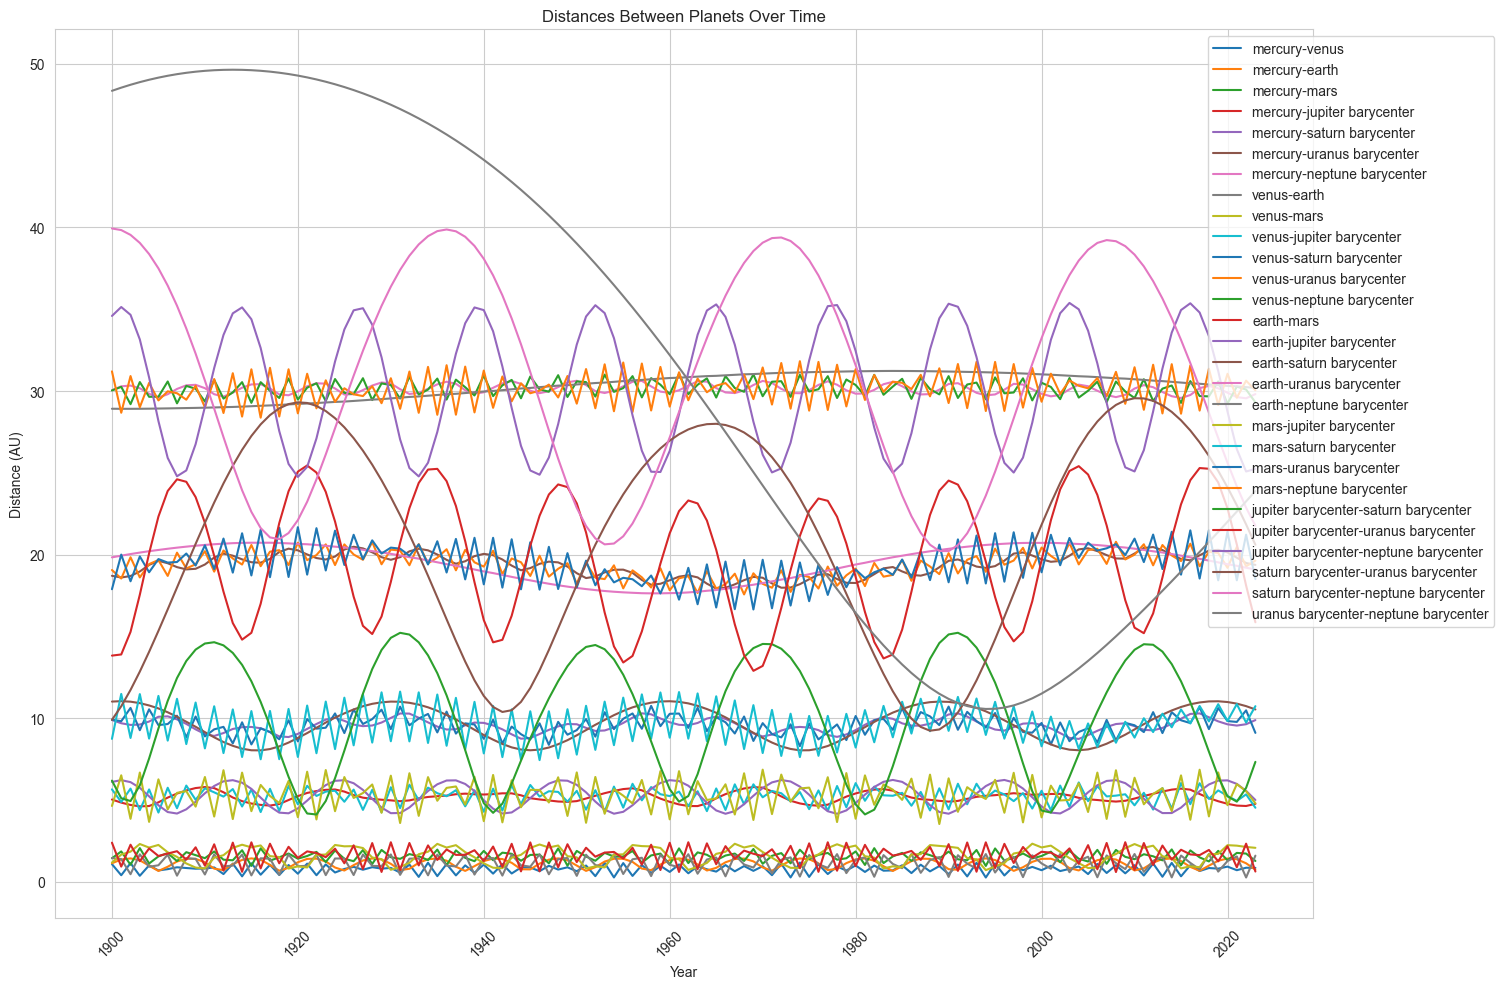

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seaborn style for better visualization
sns.set_style("whitegrid")

plt.figure(figsize=(15, 10))

# Loop through each planet pair and plot its distances over time
for planet_pair in df['pair'].unique():
    subset = df[df['pair'] == planet_pair]
    plt.plot(pd.to_datetime(subset['date']), subset['distance_au'], label=planet_pair)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Distance (AU)')
plt.title('Distances Between Planets Over Time')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [166]:
import plotly.express as px

# Create a line plot for distances between planet pairs over time
fig = px.line(df, x='date', y='distance_au', color='pair')

# Add labels and title
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Distance (AU)',
    title='Distances Between Planets Over Time',
    legend=dict(title='Planet Pair'),
    xaxis=dict(tickangle=45),
)

# Show the plot
fig.show()


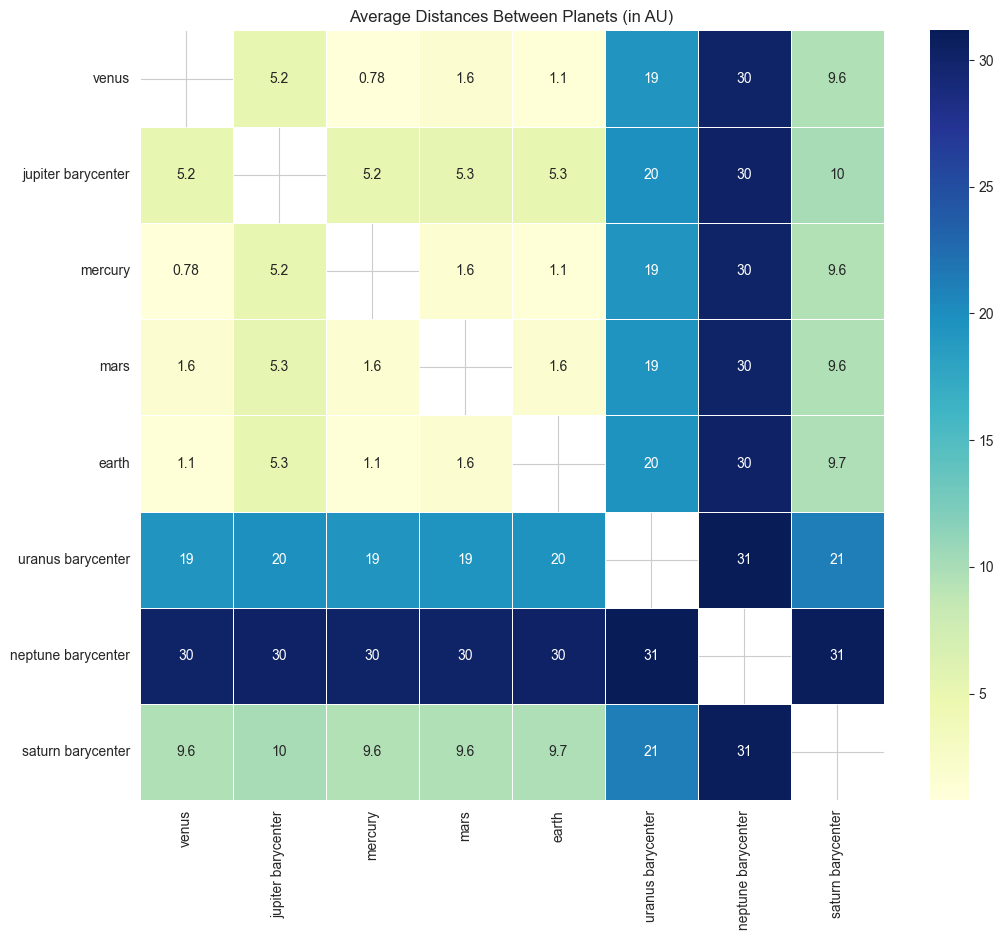

In [167]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Create a list of all unique planets
all_planets = list(set(averages_df['planet_1'].tolist() + averages_df['planet_2'].tolist()))

# Initialize an empty DataFrame with all planets as both columns and index
distance_matrix = pd.DataFrame(np.nan, index=all_planets, columns=all_planets)

# Populate the DataFrame with the average distances
for _, row in averages_df.iterrows():
    distance_matrix.loc[row['planet_1'], row['planet_2']] = row['Average Distance (AU)']
    distance_matrix.loc[row['planet_2'], row['planet_1']] = row['Average Distance (AU)']  # It's symmetric

plt.figure(figsize=(12, 10))
sns.heatmap(distance_matrix, cmap="YlGnBu", annot=True, linewidths=.5)
plt.title('Average Distances Between Planets (in AU)')
plt.show()


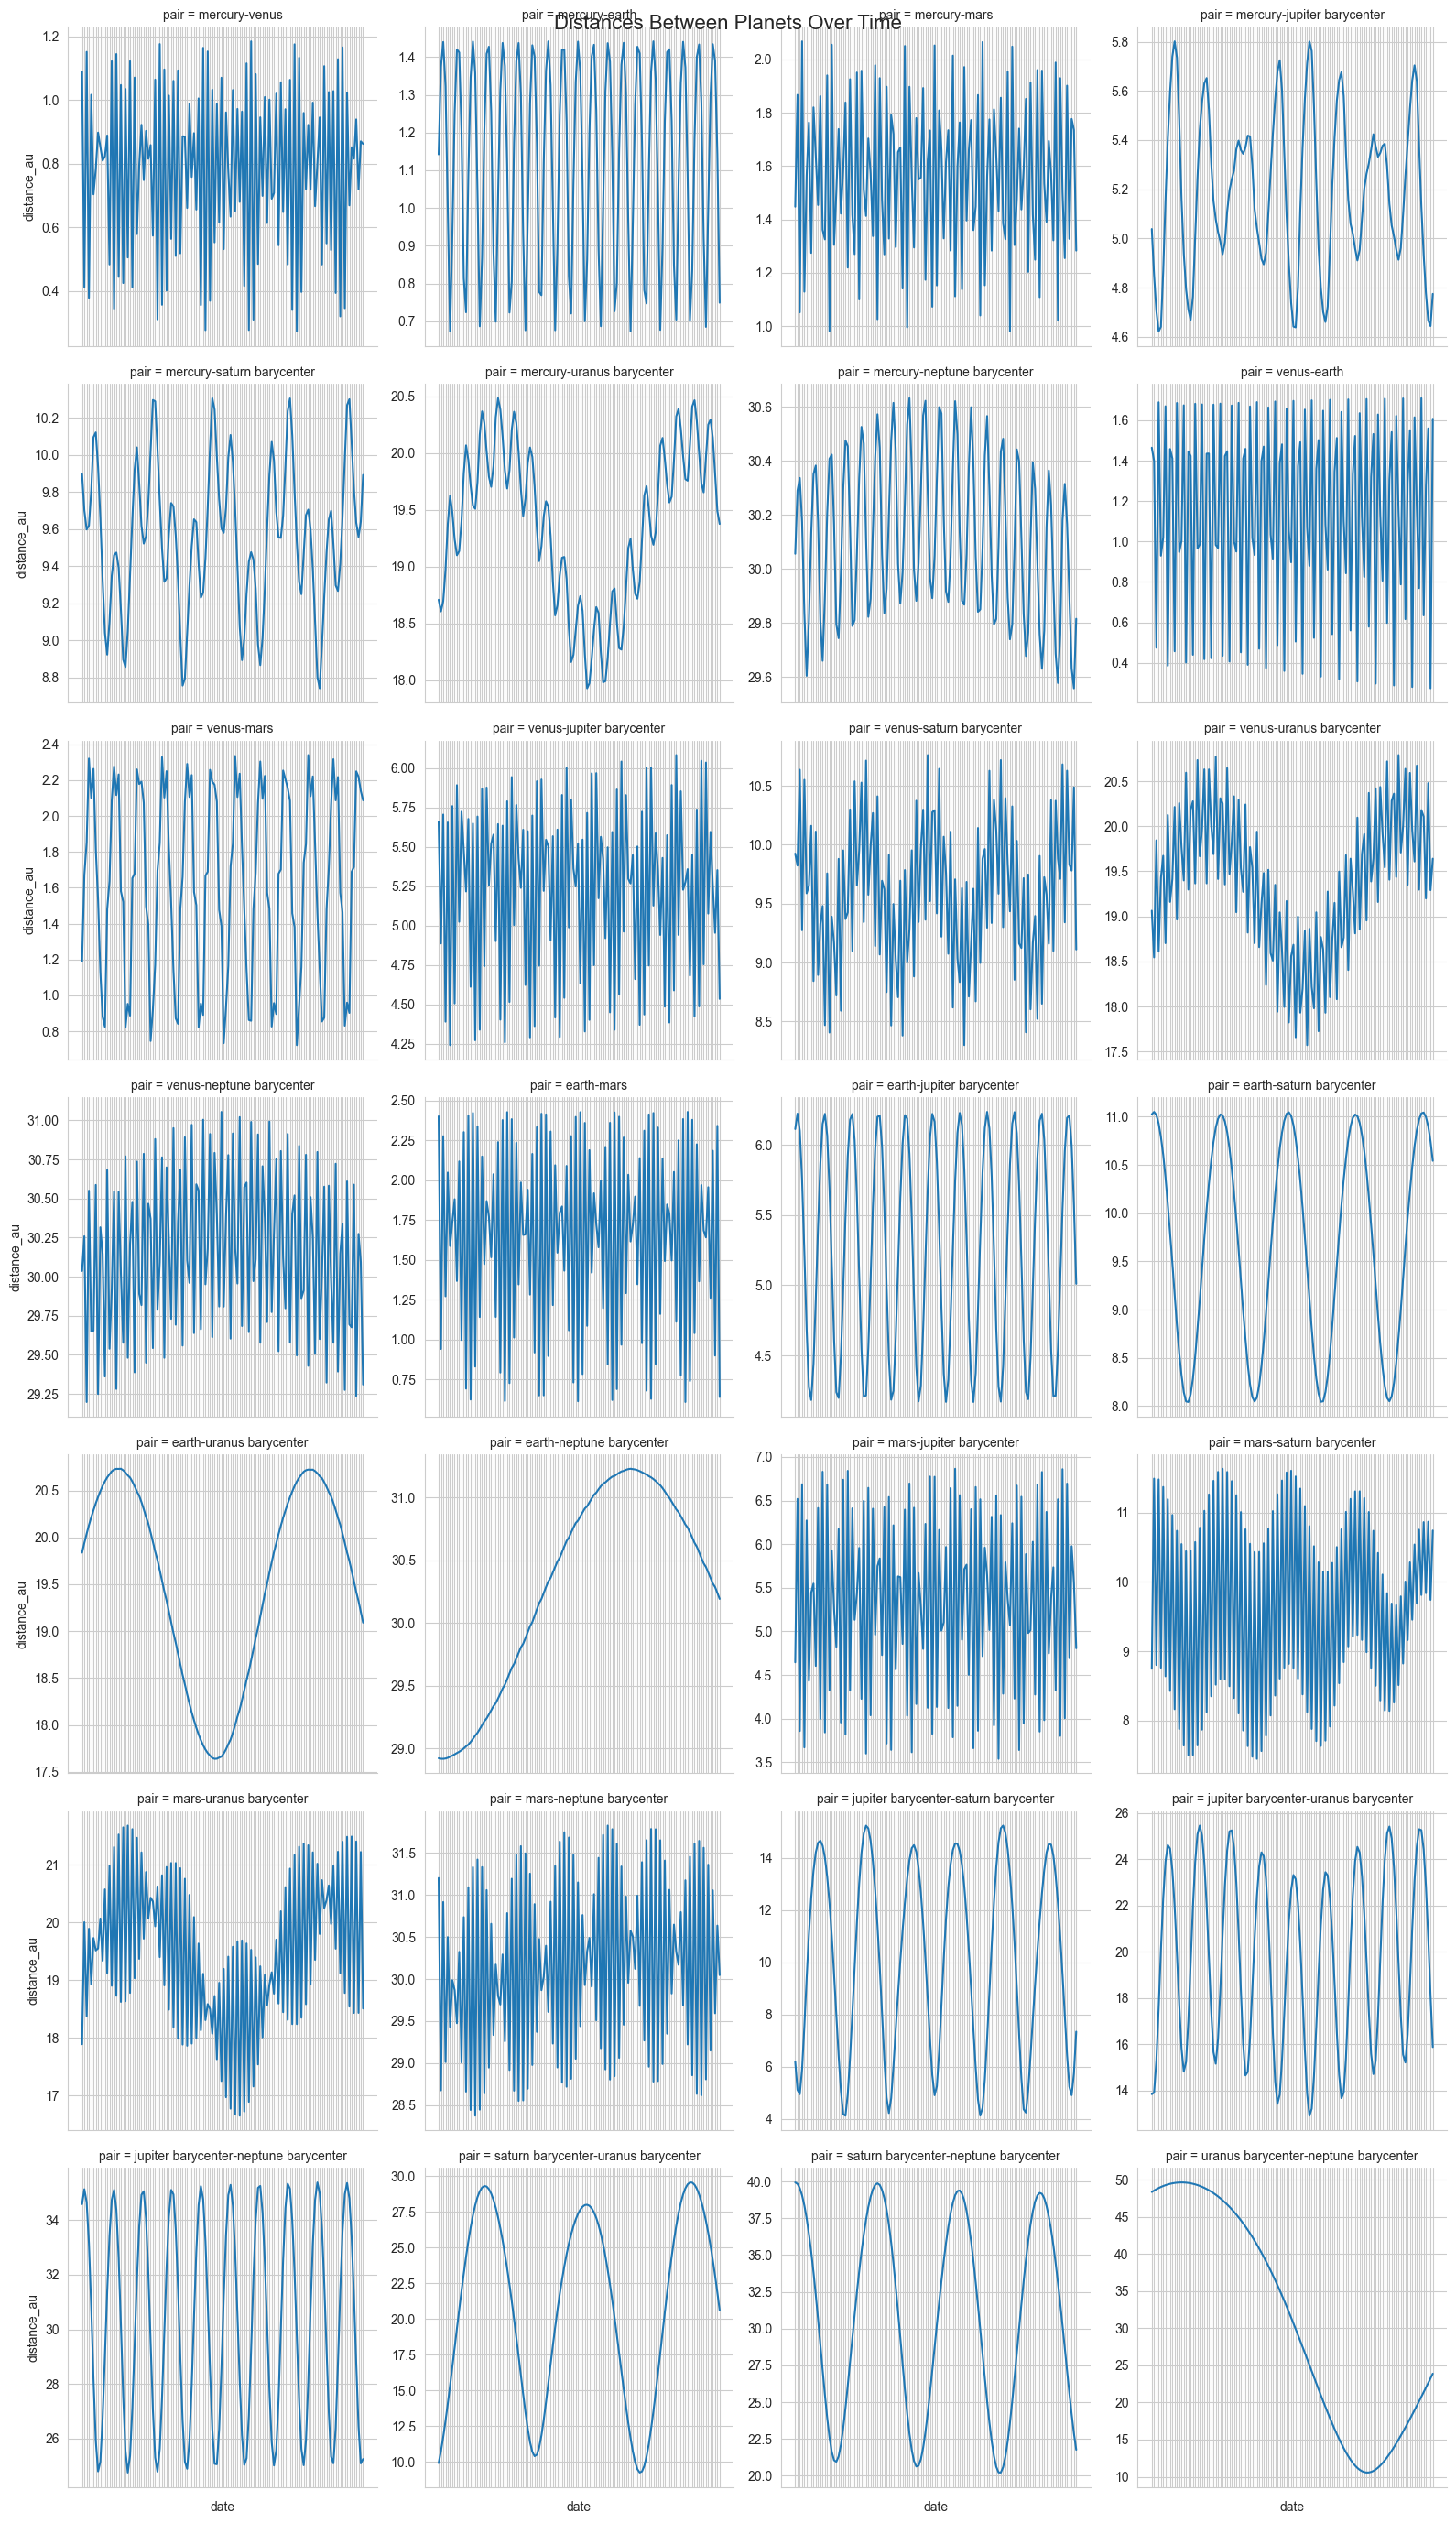

In [168]:
g = sns.FacetGrid(df, col="pair", col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, "date", "distance_au")

# Rotate x-axis labels for readability and add a super title
g.set_xticklabels(rotation=45)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Distances Between Planets Over Time', fontsize=16)
plt.tight_layout()

plt.show()


In [97]:
pip install igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [98]:
import igraph as ig
import plotly.graph_objects as go
from skyfield.positionlib import ICRF

# Extract x, y, z positions for planets on a specific date (e.g., start_date)
positions = {}
date = ts.utc(*start_date)

for planet_name, planet_obj in planets.items():
    position = planet_obj.at(date)
    x, y, z = position.position.au  # Extract x, y, z coordinates
    positions[planet_name] = (x, y, z)

# Create a graph
g = ig.Graph()

# Add vertices (planets)
g.add_vertices(list(planets.keys()))

# Compute edges based on distances and add them
for planet1, planet2 in combinations(planets.keys(), 2):
    distance = (planets[planet1].at(date) - planets[planet2].at(date)).distance().au
    g.add_edge(planet1, planet2, weight=distance)

# 3D Visualization using plotly
edge_x = []
edge_y = []
edge_z = []

for edge in g.es:
    source = g.vs[edge.source]
    target = g.vs[edge.target]
    
    x0, y0, z0 = positions[source['name']]
    x1, y1, z1 = positions[target['name']]
    
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_z.extend([z0, z1, None])

node_x = [pos[0] for pos in positions.values()]
node_y = [pos[1] for pos in positions.values()]
node_z = [pos[2] for pos in positions.values()]

edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z, mode='lines', line=dict(width=0.5, color='#888'))

node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z, mode='markers', marker=dict(symbol='circle', size=10, color=list(range(len(positions))), colorscale='Viridis', colorbar=dict(thickness=15, title='Planet Index', xanchor='left', titleside='right')))

fig = go.Figure(data=[edge_trace, node_trace])
fig.show()


In [120]:
import numpy as np
import plotly.graph_objects as go
from skyfield.api import load
from datetime import timedelta

# Load planetary ephemeris
eph = load('de421.bsp')

# Define a timescale
ts = load.timescale()

# Define the planets
planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter barycenter', 'saturn barycenter', 'uranus barycenter', 'neptune barycenter']

# Initialize planet positions
planet_positions = {planet: [] for planet in planets}

# Create a 3D solar system model for a range of dates
start_date = ts.utc(2023, 1, 1)
end_date = ts.utc(2023, 12, 31)
step = 1  # Step size in days

current_date = start_date.utc_datetime()

while current_date <= end_date.utc_datetime():
    for planet_name in planets:
        planet = eph[planet_name]
        astrometric = planet.at(ts.utc(current_date))
        x, y, z = astrometric.position.au
        planet_positions[planet_name].append((x, y, z))
    
    # Increment the date by the step size
    current_date += timedelta(days=step)

# Create a 3D visualization
fig = go.Figure()

for planet_name, positions in planet_positions.items():
    x, y, z = zip(*positions)
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, name=planet_name, mode='lines', line=dict(width=2)))

# Set axis labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='X (AU)',
        yaxis_title='Y (AU)',
        zaxis_title='Z (AU)',
        aspectmode='data'
    ),
    title='Solar System Model (2023)'
)

# Show the 3D plot
fig.show()
